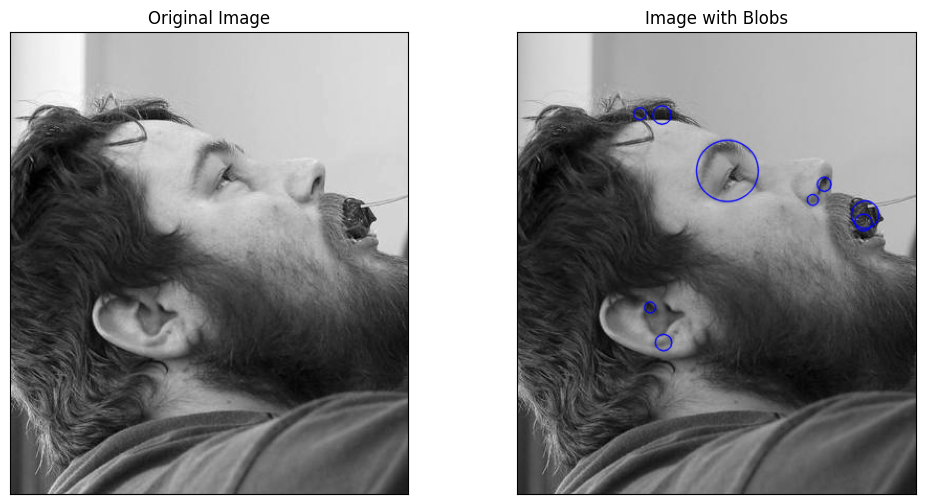

Total blobs detected: 9
Blob 1:
Position: (x=330.41, y=181.77)
Radius: 8.11
Area: 206.59

Blob 2:
Position: (x=138.00, y=79.02)
Radius: 8.80
Area: 243.03

Blob 3:
Position: (x=126.63, y=263.02)
Radius: 5.43
Area: 92.75

Blob 4:
Position: (x=332.08, y=174.34)
Radius: 13.21
Area: 548.09

Blob 5:
Position: (x=116.88, y=77.80)
Radius: 5.74
Area: 103.69

Blob 6:
Position: (x=200.44, y=132.40)
Radius: 29.39
Area: 2713.62

Blob 7:
Position: (x=292.89, y=145.25)
Radius: 6.69
Area: 140.81

Blob 8:
Position: (x=282.00, y=160.16)
Radius: 5.26
Area: 87.05

Blob 9:
Position: (x=139.52, y=296.65)
Radius: 7.81
Area: 191.83



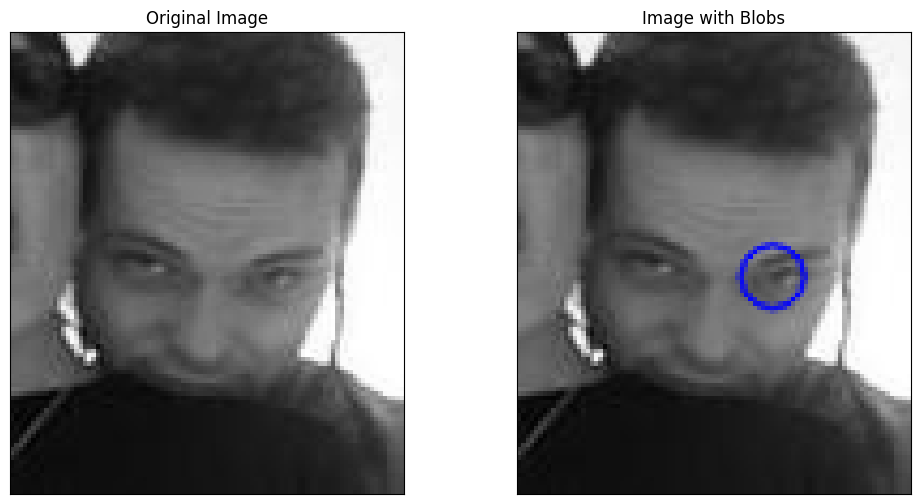

Total blobs detected: 1
Blob 1:
Position: (x=59.17, y=56.69)
Radius: 7.47
Area: 175.09



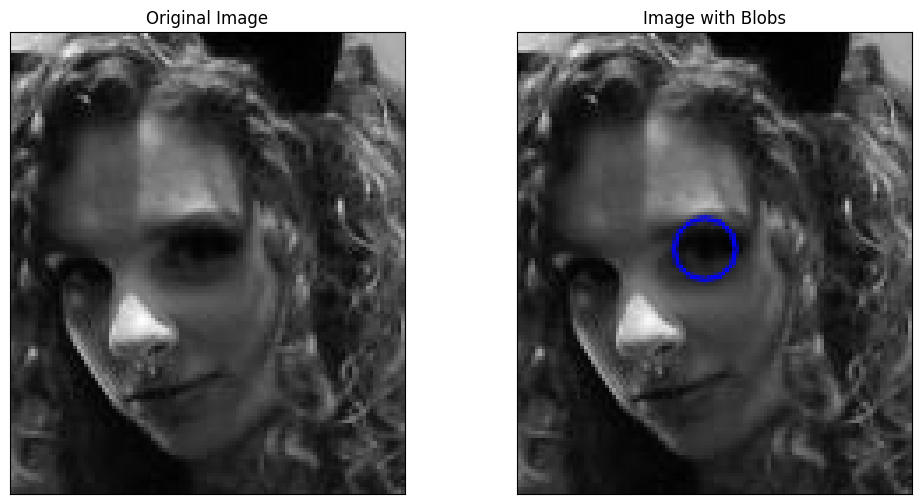

Total blobs detected: 1
Blob 1:
Position: (x=52.82, y=61.04)
Radius: 8.76
Area: 241.26



In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def detect_blobs_and_stats(image_path):
    img = Image.open(image_path)
    grayscale = img.convert('L')
    img_np = np.array(grayscale)

    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 10
    params.maxThreshold = 200
    params.thresholdStep = 10

    params.filterByArea = True
    params.minArea = 50
    params.maxArea = 5000

    # params.filterByCircularity = True
    # params.minCircularity = 0.1

    params.filterByConvexity = True
    params.minConvexity = 0.5

    # params.filterByInertia = True
    # params.minInertiaRatio = 0.1

    params.minDistBetweenBlobs = 10

    detector = cv2.SimpleBlobDetector_create(params)

    keypoints = detector.detect(img_np)

    blank = np.zeros((1, 1))
    blobs = cv2.drawKeypoints(img_np, keypoints, blank, (0, 0, 255),
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(grayscale, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(blobs)
    plt.title(f'Image with Blobs'), plt.xticks([]), plt.yticks([])
    plt.show()

    print(f"Total blobs detected: {len(keypoints)}")

    for i, keypoint in enumerate(keypoints):
        x, y = keypoint.pt
        radius = keypoint.size / 2
        area = np.pi * (radius ** 2)
        print(f"Blob {i + 1}:")
        print(f"Position: (x={x:.2f}, y={y:.2f})")
        print(f"Radius: {radius:.2f}")
        print(f"Area: {area:.2f}")
        print("")

detect_blobs_and_stats("./cropped_faces/cropped_face_6_1.jpg")
detect_blobs_and_stats("./cropped_faces/cropped_face_9_1.jpg")
detect_blobs_and_stats("./cropped_faces/cropped_face_3_1.jpg")
